# Simulation and Analysis of Game of Life

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import copy

In [18]:
# Define Tableau 10 Colors
tableau_colors = [
    (31, 119, 180),  # Blue
    (255, 127, 14),  # Orange
    (44, 160, 44),   # Green
    (214, 39, 40),   # Red
    (148, 103, 189), # Purple
    (140, 86, 75),   # Brown
    (227, 119, 194), # Pink
    (127, 127, 127), # Gray
    (188, 189, 34),  # Yellow
    (23, 190, 207),  # Cyan
]

# Normalize RGB values to range [0, 1]
tableau_colors = [(r / 255, g / 255, b / 255) for r, g, b in tableau_colors]

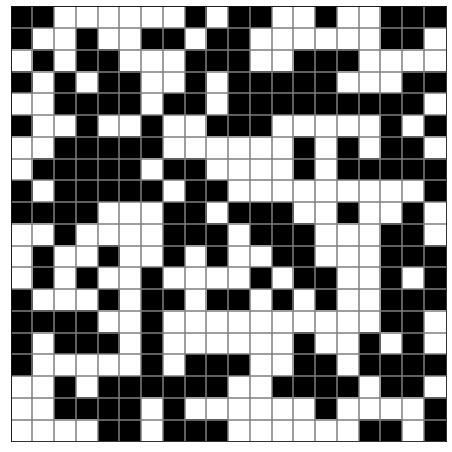

In [87]:
# Initial state library
size = 20
empty_grid = np.zeros((size, size))
init_loc = size // 2

bee_hive = copy.deepcopy(empty_grid)
bee_hive[init_loc,   init_loc]   = 1
bee_hive[init_loc,   init_loc+1] = 1
bee_hive[init_loc+1, init_loc-1] = 1
bee_hive[init_loc+1, init_loc+2] = 1
bee_hive[init_loc+2, init_loc]   = 1
bee_hive[init_loc+2, init_loc+1] = 1

toad = copy.deepcopy(empty_grid)
toad[init_loc+1, init_loc]   = 1
toad[init_loc+1, init_loc+1] = 1
toad[init_loc+1, init_loc+2] = 1
toad[init_loc+2, init_loc-1] = 1
toad[init_loc+2, init_loc]   = 1
toad[init_loc+2, init_loc+1] = 1

t_tetromino = copy.deepcopy(empty_grid)
t_tetromino[init_loc+1, init_loc+1] = 1
t_tetromino[init_loc+2, init_loc]   = 1
t_tetromino[init_loc+2, init_loc+1] = 1
t_tetromino[init_loc+2, init_loc+2] = 1

glider = copy.deepcopy(empty_grid)
glider[init_loc,   init_loc]   = 1
glider[init_loc,   init_loc+1] = 1
glider[init_loc,   init_loc+2] = 1
glider[init_loc+1, init_loc]   = 1
glider[init_loc+2, init_loc+1] = 1

# Function to initialize the grid with random values
def random_grid(size, filling_factor=0.5):
    return np.random.choice([0, 1], size * size, p=[filling_factor, 1-filling_factor]).reshape(size, size)

# Function to update the grid according to Conway's rules
def update_grid(grid):
    new_grid = grid.copy()
    size = grid.shape[0]
    
    for i in range(size):
        for j in range(size):
            left, right  = j - 1, j + 1
            top, bottom  = i - 1, i + 1
#             make the board infinite
            if i == 0:
                top = size - 1
            if i == size - 1:
                bottom = 0
            if j == 0:
                left = size - 1
            if j == size - 1:
                right = 0
            
            # Count the number of alive neighbors
            neighbors = [grid[top, left], grid[top, j], grid[top, right], \
                         grid[i, left], grid[i, right],\
                         grid[bottom, left], grid[bottom, j], grid[bottom, right]]
            num_alive = np.sum(neighbors)
            
            # Apply Conway's rules
            if grid[i, j] == 1:
                if num_alive < 2 or num_alive > 3:
                    new_grid[i, j] = 0
            else:
                if num_alive == 3:
                    new_grid[i, j] = 1

    return new_grid

# Function to update the animation
def update(frameNum, img, grid, size):
    new_grid = update_grid(grid)
    img.set_data(new_grid)
    grid[:] = new_grid
    return img

# Set the grid size and create the initial grid
grid = random_grid(size)
# grid = copy.deepcopy(bee_hive)
# grid = copy.deepcopy(toad)
# grid = copy.deepcopy(t_tetromino)
# grid = copy.deepcopy(glider)
# print(grid)

# Create the figure and axis for the animation
fig, ax = plt.subplots(figsize=(8, 8))
img = ax.imshow(grid, interpolation='none', cmap='binary')

# Hide tick labels and tick marks on the X-axis
ax.set_xticks([])
ax.set_yticks([])
for i in range(size):
    ax.axvline(x=i-0.5, color=tableau_colors[7], linestyle='-')
    ax.axhline(y=i-0.5, color=tableau_colors[7], linestyle='-')
plt.gcf().set_facecolor('white')

# Create an animation
ani = animation.FuncAnimation(fig, update, fargs=(img, grid, size),
                              frames=50, interval=100, save_count=100)

# Save the animation to a GIF file
# ani.save('./animations/random.gif', writer='pillow', fps=10)

plt.show()

# Display the animation in the Jupyter Notebook
HTML(ani.to_jshtml())

## Analysis - filling factor vs. stability

In [ ]:
size = 40
rounds = 100
seeds = np.arange(rounds) * 11
init_filling_factors = np.arange(rounds) / rounds
total_iterations = np.zeros(rounds)
iterations = 2000

# Function to check stagnancy
def is_stagnant(grid1, grid2):
    stagnant_flag = np.array_equal(grid1, grid2)
    return stagnant_flag

for i in range(rounds):
    init_filling_factor = init_filling_factors[i]
    grid = random_grid(size, filling_factor=init_filling_factor)
    for j in range(iterations):
        next_grid = update_grid(grid)
        if is_stagnant(grid, next_grid):
            break
        grid[:] = next_grid
    total_iterations[i] = j 
    

    

# Function to update the animation
# def get_filling_factor(grid):
#     factor = grid.sum() / (size * size)
#     return factor


# # Create the figure and axis for the animation
# fig, ax = plt.subplots(figsize=(8, 8))
# img = ax.imshow(grid, interpolation='none', cmap='binary')



In [ ]:
total_iterations

In [89]:
total_sum

45

In [90]:
total_sum_method

45